<a href="https://colab.research.google.com/github/keivalya/artisan-ai-assignment/blob/main/email_engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/keivalya/artisan-ai-assignment.git && cd artisan-ai-assignment

Cloning into 'artisan-ai-assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 22.39 KiB | 4.48 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
# Importing raw dataset and exploring it
import pickle
with open('artisan-ai-assignment/email_campaigns.pkl', 'rb') as f:
    data = pickle.load(f)
data

[{'example1': [{'subject': '🚀 Propel Your Marketing ROI with Advanced Analytics!',
    'body': "Hey [Recipient's Name],\n\nReady to see your marketing performance soar? With our cutting-edge Marketing Analytics services, your business can harness the power of data to drive decision-making and skyrocket ROI!\n\nQuick question - are you leveraging your data to its full potential? Let's talk strategy! 👉 [meeting link]\n\nBest,\n[Your Name]",
    'opened': False,
    'meeting link clicked': False,
    'responded': False},
   {'subject': 'Data is Your Superpower 📊 Unlock Insights with Us',
    'body': "Hi [Recipient's Name],\n\nI'm reaching out again because I believe our last message might've slipped through the cracks. With your goals in mind, our marketing analytics can translate your data into actionable strategies that can redefine your marketing's success.\n\nCan we help you harness this superpower? Book a time on my calendar: [meeting link]. Looking forward to connecting!\n\nCheers,\

In [3]:
# Converting dataset into a readable (structured) dataFrame
import pandas as pd

file_path = 'artisan-ai-assignment/email_campaigns.pkl'
email_campaigns_df = pd.read_pickle(file_path)

email_list = []
for campaign_dict in email_campaigns_df:
    for campaign_key in campaign_dict:
        email_list.extend(campaign_dict[campaign_key])

filtered_email_list = [element for element in email_list if isinstance(element, dict)]
filtered_email_df = pd.DataFrame(filtered_email_list)
filtered_email_df

,subject,body,opened,meeting link clicked,responded,meeting_link_clicked
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False,NaN
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,NaN
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,NaN
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False,NaN
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False,NaN
...,...,...,...,...,...,...
149,Streamline HR and Boost Performance 💼,"Hello [Recipient's Name],\n\nEfficiency is kin...",True,True,False,NaN
150,Boost Your Brand Visibility 🚀,"Hello [Recipient's Name],\n\nWant to skyrocket...",True,False,False,NaN
151,🔍 Outpace Competitors with Insightful Analytics,"Hi [Recipient's Name],\n\nI noticed you're nav...",True,False,False,NaN
152,Tailored Analytics for You,"Hey [Recipient's Name],\n\nYour brand deserves...",False,False,False,NaN


## Performing an **exploratory data analysis** (EDA) on the filtered email DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# information about the DataFrame
info = filtered_email_df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               154 non-null    object
 1   body                  154 non-null    object
 2   opened                154 non-null    object
 3   meeting link clicked  138 non-null    object
 4   responded             154 non-null    object
 5   meeting_link_clicked  16 non-null     object
dtypes: object(6)
memory usage: 7.3+ KB


In [6]:
# statistics for numerical columns
description = filtered_email_df.describe()
description

,subject,body,opened,meeting link clicked,responded,meeting_link_clicked
count,154,154,154,138,154,16
unique,154,154,2,2,2,2
top,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",True,False,False,False
freq,1,1,114,97,146,11


In [7]:
# missing values check
missing_values = filtered_email_df.isna().sum()
missing_values

subject                   0
body                      0
opened                    0
meeting link clicked     16
responded                 0
meeting_link_clicked    138
dtype: int64

True     114
False     40
Name: opened, dtype: int64


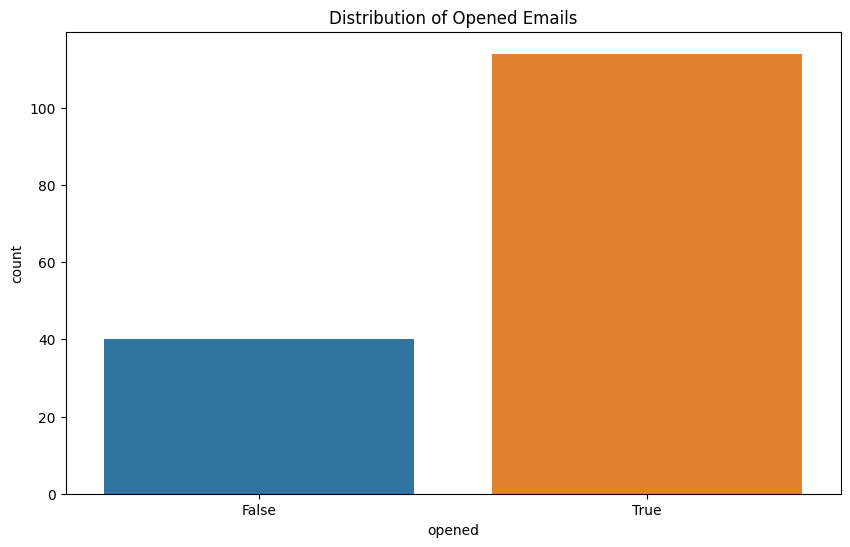

In [8]:
# Distribution of opened emails
opened_distribution = filtered_email_df['opened'].value_counts()
print(opened_distribution)

# Visualization: Distribution of opened emails
plt.figure(figsize=(10, 6))
sns.countplot(x='opened', data=filtered_email_df)
plt.title('Distribution of Opened Emails')
plt.show()

False    97
True     41
Name: meeting link clicked, dtype: int64


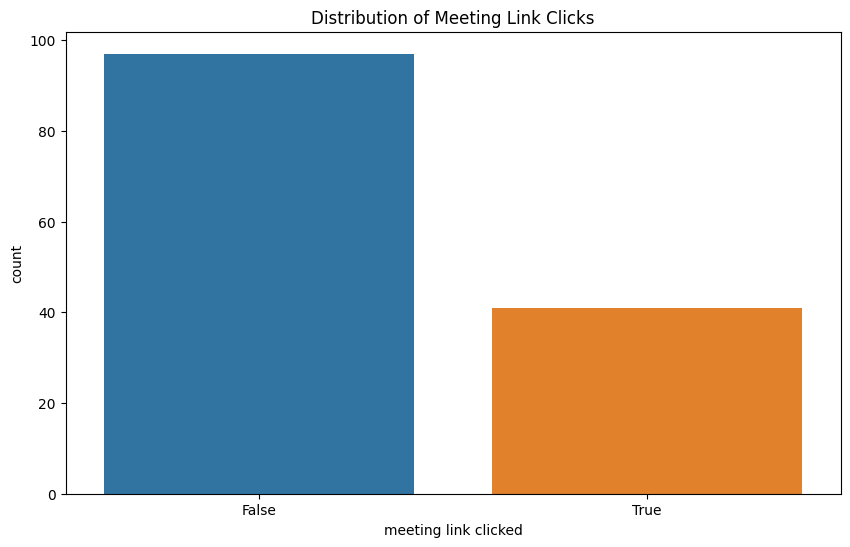

In [9]:
# Distribution of clicks on meeting link
link_clicked_distribution = filtered_email_df['meeting link clicked'].value_counts()
print(link_clicked_distribution)

# Visualization: Distribution of clicks on meeting link
plt.figure(figsize=(10, 6))
sns.countplot(x='meeting link clicked', data=filtered_email_df)
plt.title('Distribution of Meeting Link Clicks')
plt.show()

False    146
True       8
Name: responded, dtype: int64


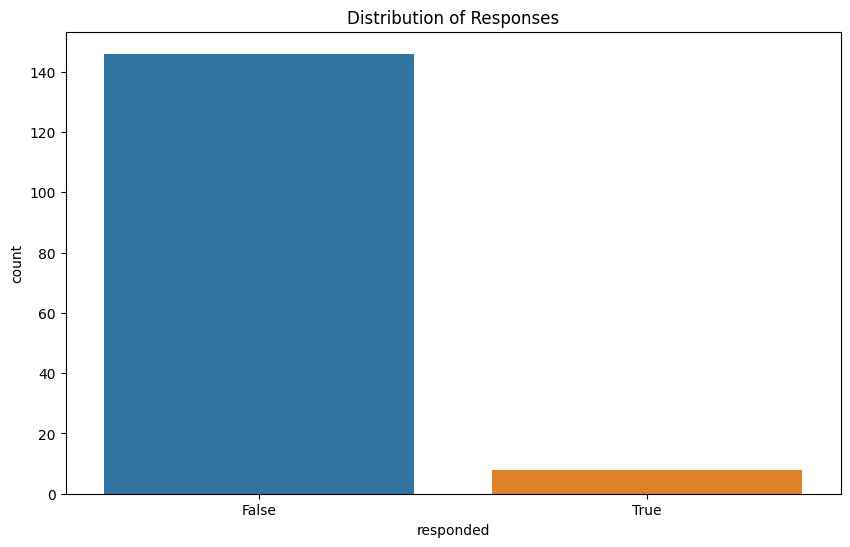

In [10]:
# Distribution of responses
response_distribution = filtered_email_df['responded'].value_counts()
print(response_distribution)

# Visualization: Distribution of responses
plt.figure(figsize=(10, 6))
sns.countplot(x='responded', data=filtered_email_df)
plt.title('Distribution of Responses')
plt.show()